### Linear Regression

- Intuition
Linear Regression is used to predict continuous values. It's like trying to draw the best straight line through a cloud of data points.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('insurance.csv')
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
data_encoded = pd.get_dummies(data, drop_first=True)

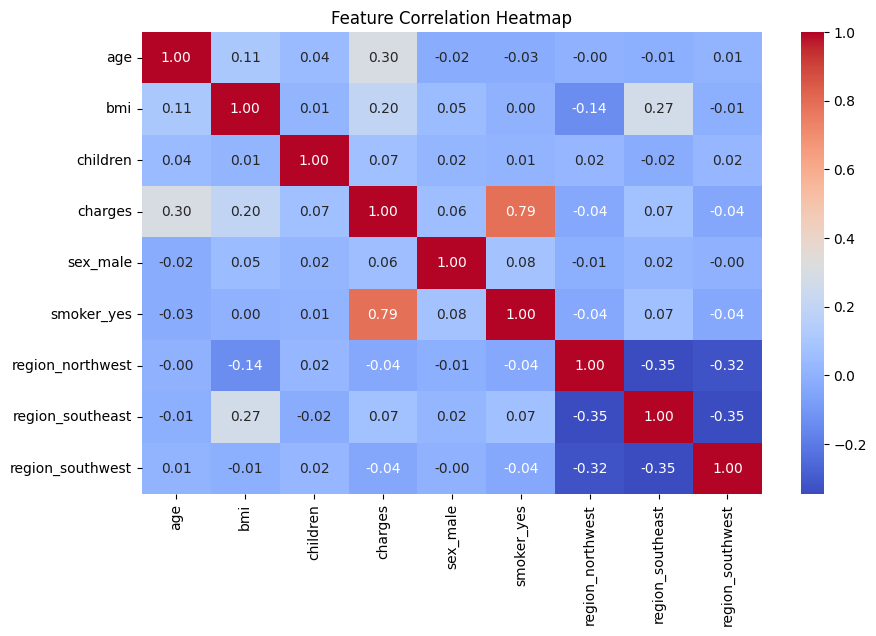

In [5]:
# 4. Visualize Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# print(y_pred)

In [9]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 33596915.85136146
R² Score: 0.7835929767120723


In [11]:
coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
print("\nFeature Coefficients:")
print(coeff_df.sort_values(by="Coefficient", ascending=False))


Feature Coefficients:
                   Coefficient
smoker_yes        23651.128856
children            425.278784
bmi                 337.092552
age                 256.975706
sex_male            -18.591692
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354


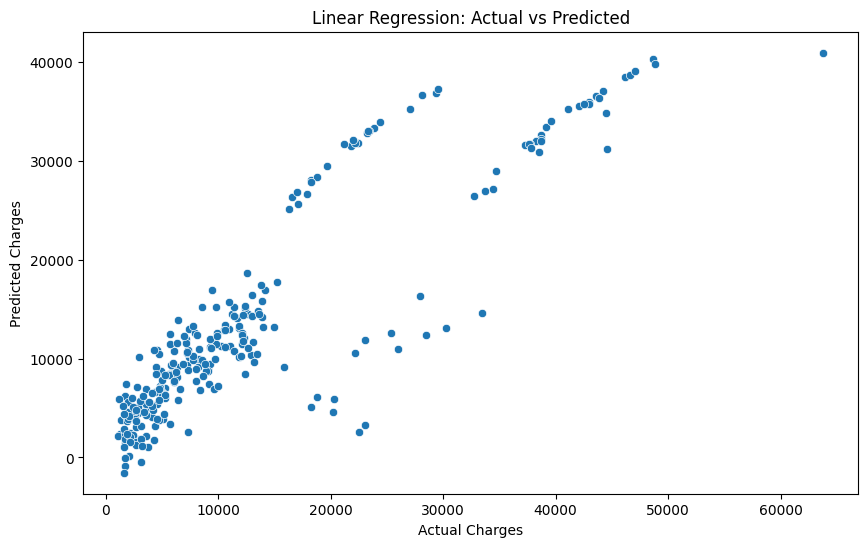

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

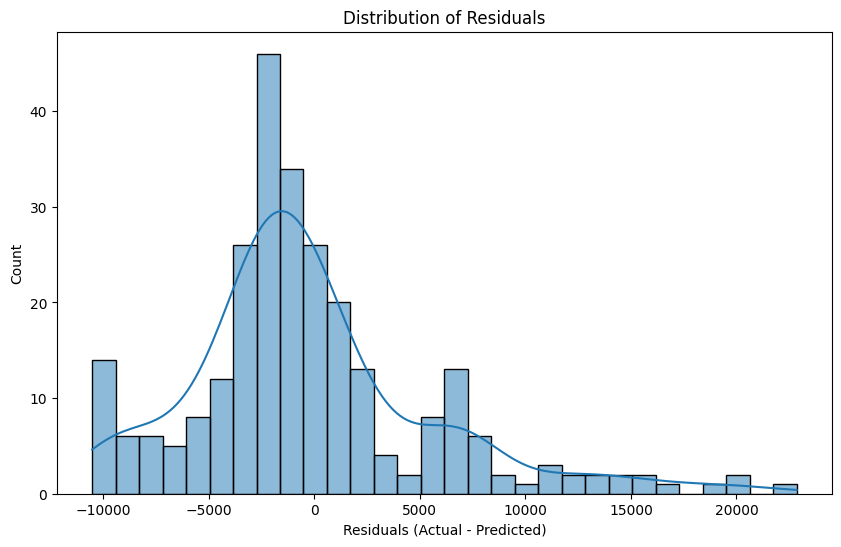

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Distribution of Residuals")
plt.show()

### Logistic Regression

- Intuition
Linear Regression is used to predict continuous values. It's like trying to draw the best straight line through a cloud of data points.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [ ]:
data = pd.read_csv("diabetes.csv")
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [17]:
print("\nDataset Info:")
# print(data.info())

print("\nMissing Values:")
# print(data.isnull().sum())


Dataset Info:

Missing Values:


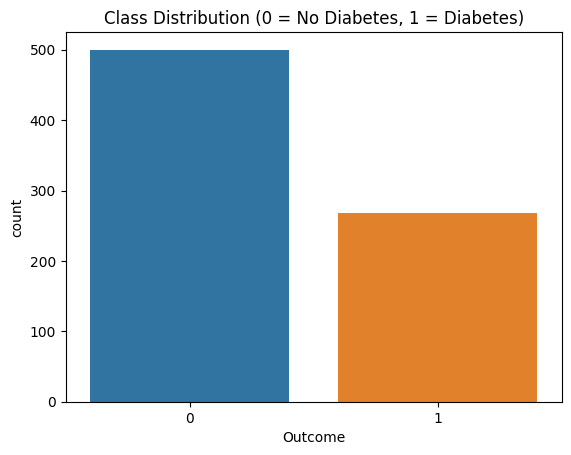

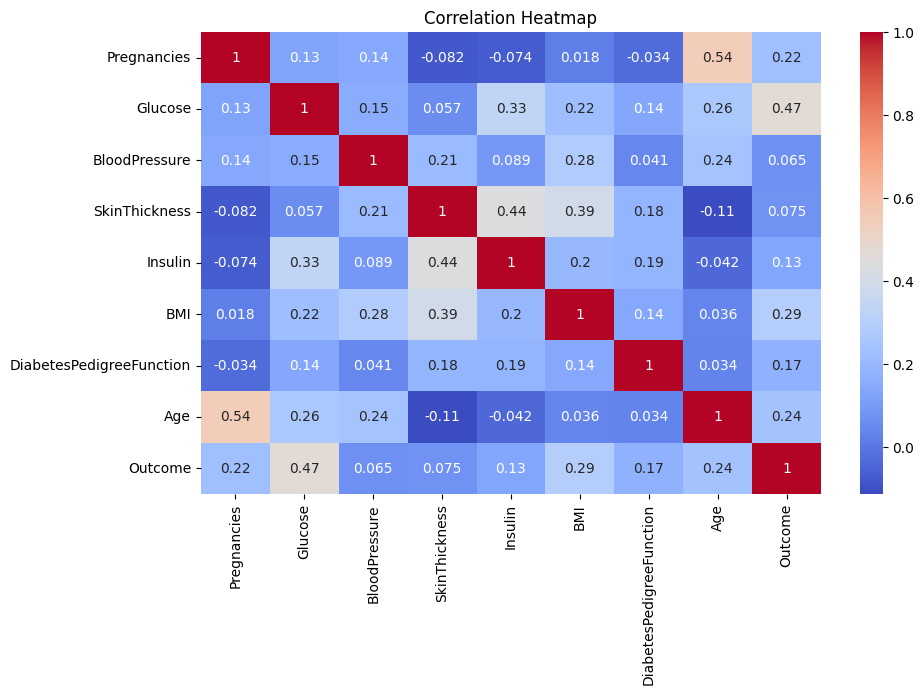

In [18]:
sns.countplot(x="Outcome", data=data)
plt.title("Class Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Training Samples:", X_train.shape[0])
print("Testing Samples :", X_test.shape[0])

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.